In [ ]:
pip install gTTS

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from gtts import gTTS
import os
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
import matplotlib.pyplot as plt

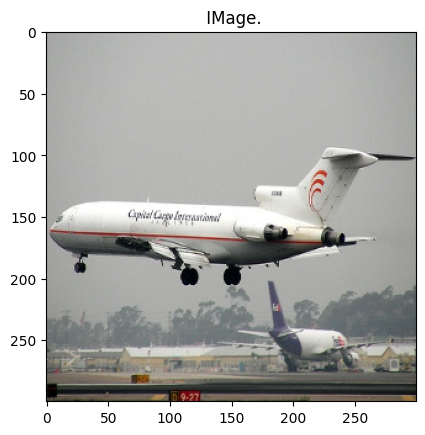

In [73]:

def img_processing(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_resized = cv2.resize(image_rgb, (300, 300))

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image_resized).unsqueeze(0)

    return image_tensor, image_resized

image_path = "/content/2007_002266.jpg"
image_tensor, resized_image = img_processing(image_path)

plt.imshow(resized_image)
plt.title(" IMage.")
plt.axis("on")
plt.show()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


airplane detected with confidence 1.00. airplane detected with confidence 1.00


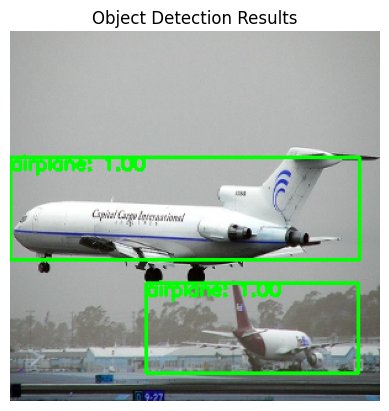

In [77]:

coco_labls = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

def model(image_tensor, original_image):
    model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
    model.eval()

    with torch.no_grad():
        predictions = model(image_tensor)

    bboxes = predictions[0]['boxes']
    scores = predictions[0]['scores']
    labels = predictions[0]['labels']

    confidence_score = 0.5
    feedback_data = []

    h, w, _ = original_image.shape

    for i in range(len(scores)):
        if scores[i] > confidence_score:
            x1, y1, x2, y2 = map(int, bboxes[i])
            x1, x2 = int(x1 * w / 300), int(x2 * w / 300)
            y1, y2 = int(y1 * h / 300), int(y2 * h / 300)

            cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label_name = coco_labls[int(labels[i])]

            label = f"{label_name}: {scores[i]:.2f}"
            cv2.putText(original_image, label, (x1, y1 + 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            feedback_data.append(f"{label_name} detected with confidence {scores[i]:.2f}")

    if feedback_data:
        print(". ".join(feedback_data))
    else:
        print("No objects detected above the confidence threshold.")

    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Object Detection Results")
    plt.axis("off")
    plt.show()
model (image_tensor, resized_image)